# Python for Data Analysis
In this notebook, we are going to continue with our exposition of scientific computing with Python, particularly looking at data analysis tools in the Scipy stack. We are going to have a brief introduction to two libraries: pandas and scikit-learn.

## Pandas
Pandas - derived from 'panel data' not the cute animal :( - is a library for data analysis and manipulation. If you have used R before, you'd find some of the Pandas constructs very familiar. The main construct in Pandas is the dataframe object, which you can think of as a table where the rows are the observations and the columns are the variables/features.

## Scikit-learn
Scikit-learn is a machine learning library in Python. It implements some of the most popular machine learning algorithms as well as useful utilities for preprocessing data and validating models.

## Tutorial
This notebook is written as a tutorial on how to do a simple data analysis excercise in Python. We will be using the Boston Housing dataset which contains descriptions of houses in Boston and their corresponding prices. The task is to predict the prices from the descriptions. We start off by loading Numpy and Pandas.

In [2]:
import numpy as np
import pandas as pd

Then we load the Boston Housing dataset. This dataset is available in scikit-learn. 

Note: if scikit-learn is not updated, the dataset will not load. This is due to Anaconda (the software we use to simplify Python library management) updated at regular interval that don't necessarily coincide with package updates. Should this happen, go to your **terminal** and type `pip install --ignore-installed --upgrade sklearn`. This will force anaconda to update the library and dependencies stated. Then **restart** your Jupyter Notebook and run the cells again.

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

/home/sstamnas/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

Let's check the type of the object that we loaded.

In [4]:
type(boston) # Dictionary like object

sklearn.utils.Bunch

This object is similar to a Python dictionary (the reason I know this is because I have looked at the docs and played around a bit!). We can look at its keys.

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


Let's check the types of some of the values.

In [5]:
type(boston['data'])

numpy.ndarray

In [6]:
type(boston['target'])

numpy.ndarray

Since both are Numpy arrays, we can use the stuff that we learned from the last tutorial to explore more. For instance, we can look at the shape.

In [6]:
boston['data'].shape # 506 observations with 13 features each

(506, 13)

Let's explore more by printing the rest of the values.

In [8]:
print(boston['feature_names']) # Names for features

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston['DESCR']) # Description of dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now that we know what we are working with, we can store the dataset in a Pandas dataframe for further exploration and manipulation.

In [8]:
boston_df = pd.DataFrame(boston['data'])
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The `head` method in a Pandas dataframe displays the first five rows of the dataframe by default. It is a good way to take a quick look at the data. As we can see, we have 13 features, all taking numerical values. To make things more clear, we can label the columns with the feature names, to know which column corresponds to which feature.

In [11]:
boston_df.columns = boston['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Much better! Sadly, we are still missing one thing - the prices of the houses (target values)! We can add them to the dataframe by creating a new column and assigning it the corresponding values.

In [9]:
boston_df['PRICE'] = boston['target']
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now that we have the complete dataframe, we can explore further. One easy way to do so is to look at summary statistics. We can easily do this with Pandas.

In [13]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Here, we get the count of non-missing values, the column mean, column standard deviation, the minimum, the maximum and the 25th, 50th and 75th percentiles. These give a good picture of the statistics of the data we have. One thing to notice is that each column seems to have a different mean and standard deviation. This can cause problems when fitting a statistical/machine learning model (not always!). A good practice is to standardise the data before fitting it to a model. We will learn how to do that in Pandas. But first, let's split our data into a training and a test set. We will do a 70/30 split.

In [47]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
train = boston_df.sample(frac=0.7)
train.shape

(354, 14)

In [11]:
train = boston_df.sample(frac=0.7) # Select a random sample of rows amounting to 70% of observations
test = boston_df.drop(train.index) # Select the remaining rows as test

In [12]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71,21.7
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
# Sanity check
print(train.shape)
print(test.shape)

(354, 14)
(152, 14)


Now that we have the split, let's standardise. To standardise a variable, we subtract it's mean and divide by its standard deviation:
$$
z = \frac{x - \mu}{\sigma}
$$
One important thing to note here is that we calculate the mean and the standard deviation on the training set only and then apply on the test set.

In [16]:
means = train.mean(axis=0)
stds = train.std(axis=0)

In [14]:
standard_train = (train - means) / stds
standard_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
103,-0.363947,-0.496526,-0.358845,-0.26323,-0.283951,-0.232418,0.676087,-0.520107,-0.490193,-0.103707,1.173174,0.427316,0.146027,-0.368913
3,-0.383059,-0.496526,-1.273441,-0.26323,-0.815767,1.008793,-0.781306,1.037079,-0.726125,-1.076451,0.138208,0.428972,-1.344598,1.143897
214,-0.355636,-0.496526,-0.067838,-0.26323,-0.549859,-1.277572,-2.042512,-0.114099,-0.608159,-0.746198,0.091164,-0.044148,2.433070,0.103170
301,-0.382739,0.968584,-0.712929,-0.26323,-1.030210,0.420623,-0.970487,0.771694,-0.254260,-0.433959,-1.084934,0.440567,-0.413312,-0.079226
262,-0.331048,0.365304,-1.016838,-0.26323,0.805416,3.027022,0.819724,-0.718366,-0.490193,-0.824258,-2.543295,0.348531,-0.922964,2.796186


In [41]:
standard_test = (test - means) / stds
standard_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
4,-0.379148,-0.496526,-1.273441,-0.26323,-0.815767,1.223590,-0.487025,1.037079,-0.726125,-1.076451,0.138208,0.452473,-1.005303,1.444313
7,-0.371097,0.042118,-0.457759,-0.26323,-0.249640,-0.181962,0.980878,0.985118,-0.490193,-0.542042,-1.508329,0.452473,0.956642,0.467961
11,-0.373985,0.042118,-0.457759,-0.26323,-0.249640,-0.416942,0.518436,1.113601,-0.490193,-0.542042,-1.508329,0.452473,0.121893,-0.411830
12,-0.376511,0.042118,-0.457759,-0.26323,-0.249640,-0.589933,-1.019534,0.752715,-0.490193,-0.542042,-1.508329,0.386215,0.468285,-0.111413
14,-0.318485,-0.496526,-0.419054,-0.26323,-0.129552,-0.291523,0.574490,0.292653,-0.608159,-0.566060,1.220218,0.277719,-0.305420,-0.486934


## Task 1
I made a methodological mistake in the standardisation process. Can you spot it? Hint: look at the variable descriptions.

## Regression
Now let's fit a linear regression to the above data. We want to predict the price of the houses based on the other variables. Hence, we split the training dataframe to features and targets (features/labels, inputs/outputs, independent/dependent variables, etc...).

In [20]:
Y_train = standard_train['PRICE']
X_train = standard_train.drop('PRICE', axis=1)

We use `scikit-learn` to fit a linear regression model rather than implementing our own as in the previous tutorial.

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # Create linear regression model object
model.fit(X_train, Y_train)

LinearRegression()

And voila! Just like that, the model is fit!!! Now we can use it to predict on new values (test values).

In [22]:
Y_test = standard_test['PRICE']
X_test = standard_test.drop('PRICE', axis=1)
Y_predicted = model.predict(X_test)

We can see how well we did by plotting the true values against the predicted values.

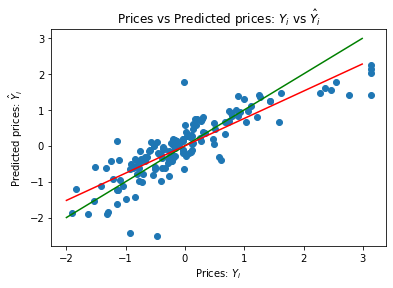

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(Y_test, Y_predicted)
xx = np.arange(-2, 3, 0.01)
yy = np.arange(-2, 3, 0.01)

a = np.polyfit(Y_test,Y_predicted, deg = 1)

plt.plot(xx, yy, c='green')
plt.plot(xx, a[1] +a[0]*xx, c='red')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$"); #Example of using LaTeX in plots

Not too shabby given that we have made a mistake in the preprocessing! To have a clearer idea on how well we did and to be able to compare to other model, we can calculate the mean sqaured error.

In [40]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predicted)
print(mse)

Y_polyfit = a[1]+a[0]*Y_test

mse_polyfit =  mean_squared_error(Y_predicted, Y_polyfit)
print(mse_polyfit)

0.2598688365413898
0.20330327273919138


Now we have a numerical value of our performance to compare to other models.

## Capstone project
Try to improve on the above results, either by having better data preprocessing or by using other models from the `scikit-learn` library (Look at the regression section [here](http://scikit-learn.org/stable/)). Note, if you choose not to standardise, you can do so for all the variables except the *price*, since the mean squared error comparisons won't be valid otherwise. I.e. the MSE from above will not have the same scale as the MSE from a non-standardised model, so they cannot be compared. Maybe try alternative comparison methods.

## Advanced: Python Classes

There are different ways to code. So far we have only described procedural programming paradigm where code is written in one "block". Another approach would be to define object whom have the functions attached to them, so called "object orentated" programming (OOP). Java and C++ are classic OOP languages but Python also allows for OOP using Python Classes. N.B Julia uses Structs which are sort of similar, more in the next notebook.

Classes are composed of member variables/attributes and methods. We used the class as a "type" for our object i.e an array object could be considered an Array class where the individual entries are attributes and the functions such as .size() as the methods. 

The member variables may be called with the "." notation wthout brackets "()" while methods are called with the "." and brackets with inputs as per function notation.

### Instantiating a Class

In [7]:
# define a new base class called Animal
class Animal:
    # initialisation function: when we define an object/instance of the Animal class we provide the inputs arguments
    # i.e name and sound. The input acts upon the object hence the "self" input but this is not provided when called
    def __init__(self, name, sound): 
        # we access the member variables of the current object "self.varname" and set the values
        self.name = name
        self.sound = sound
    
    # member methods; here they just print the data but in general may act like any other function.
    def speak(self):
        print(self.sound)
        
    def details(self):
        print("details:",self.name,",", self.sound)
        
    # an example of a more complicated member function; the input is a second object of class Animal and we call
    # the member variables from this new class.
    def groupNoise(self,second_animal):
        noiseString = self.sound + "+" + second_animal.sound
        print(noiseString)

In [8]:
# code block

# we define an object called "x" which is of the Animal class. The input arugments are strings.
x = Animal("pig", "oink")

# from the object we call the member methods.
x.speak() 
x.details()

oink
details: pig , oink


In [14]:
# derived class. The FarmAnimal class builds upon the Animal class as shown in the brackets (Animal) after the name
class FarmAnimal(Animal):
    # the class has it's own init function but calls the init of the class it derives from 
    def __init__(self, name, sound, dwelling):
        # super() keyword refers to the Animal class and calls the "__init__" function
        super().__init__(name, sound) 
        # set the new member variable "dwelling"
        self.dwelling = dwelling
    
    # new member function
    def location(self):
        print(self.dwelling)
        
    # This function overrides the inherited Animal.details() function as the names are the same. 
    def details(self):
        print("details:",self.name,",", self.sound,",", self.dwelling)


In [15]:
# code block for the FarmAnimal derived class
x = FarmAnimal("pig", "oink", "paddock") 
x.speak() # defined in the base Animal class.
x.location() 
x.details() # defined in base Animal but overriden in the FarmAnimal class so will have new behaviour

oink
paddock
details: pig , oink , paddock


In [24]:
# further derived class but this time deriving from FarmAnimal. As FarmAnimal inherits from Animal so too does Pig
class Pig(FarmAnimal):
    # we initialise the class with a default argument
    def __init__(self, colour="pink"):
        # we can specify the arguments for the base init
        super().__init__("pig", "oink", "paddock") 
        self.colour = colour # new member variable
        
    def appearance(self):
        print(self.colour)
        
    # overridden details method
    def details(self):
        print("details:",self.colour)
        
x = Pig()
x.speak() 
x.location() 
x.appearance()
x.details()

oink
paddock
pink
details: pink


In [28]:
# a second class may also iherit from FarmAnimal. 
class Cow(FarmAnimal):
    def __init__(self, colour="brown"):
        super().__init__("cow", "moo", "field") 
        self.colour = colour
        
    def appearance(self):
        print(self.colour)
        
   # def details(self):
    #    print("details:",self.colour)
        
x = Cow()
x.speak() 
x.location() 
x.appearance()
x.details()

moo
field
brown
details: cow , moo , field


In [26]:
# we can test the more complicated memebr function that all these classes inherit from Animal.
x = Pig() # an object of the "Pig -> FarmAnimal -> Animal" class
y = Cow() # an object of the "Cow -> FarmAnimal -> Animal" class

x.groupNoise(y) # Pig.groupNoise(Cow)

oink+moo
